# SGD: Weighted samples
- 가중치가 적용된 데이터셋의 결정 함수를 그림
- 점의 크기는 가중치에 비례

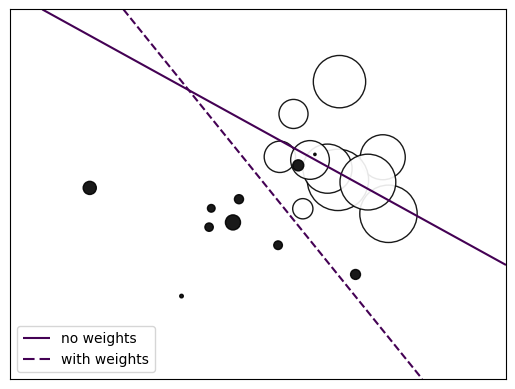

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# 20개의 포인트를 생성
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# 마지막 10개의 샘플에 더 큰 가중치 할당
sample_weight[:10] *= 10

# 가중치가 적용된 포인트를 그림
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
fig, ax = plt.subplots()
ax.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=sample_weight,
    alpha=0.9,
    cmap=plt.cm.bone,
    edgecolor="black",
)

# 가중치가 없는 모델을 적합
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["solid"])

# 가중치가 있느 모델을 적합
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, sample_weight=sample_weight)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = ax.contour(xx, yy, Z, levels=[0], linestyles=["dashed"])

no_weights_handles, _ = no_weights.legend_elements()
weights_handles, _ = samples_weights.legend_elements()
ax.legend(
    [no_weights_handles[0], weights_handles[0]],
    ["no weights", "with weights"],
    loc="lower left",
)

ax.set(xticks=(), yticks=())
plt.show()